In [54]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

#xdf1 = pd.read_excel('data/xdata1.xlsx')
#xdf2 = pd.read_excel('data/xdata2.xlsx')
#ydf1 = pd.read_excel('data/ydata1.xlsx')
#ydf2 = pd.read_excel('data/ydata2.xlsx')

#xts1 = xdf1['#data']
#yts1 = ydf1['#data']
#xts2 = xdf2['#data']
#ts2 = ydf2['#data']

In [55]:
xdf1 = pd.read_excel('xdata1.xlsx')
xdf2 = pd.read_excel('xdata2.xlsx')
ydf1 = pd.read_excel('ydata1.xlsx')
ydf2 = pd.read_excel('ydata2.xlsx')

xts1 = xdf1['#data']
yts1 = ydf1['#data']
xts2 = xdf2['#data']
yts2 = ydf2['#data']

In [56]:
x = [] # train
y = [] # test (answer)
for i in range(0, 980):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

In [43]:
input = np.array(xts1[i:i+10]) 
input = input.reshape((1,10,1))
yhat = m.predict(input)

In [13]:
print(yhat)

[[[0.44661233]]]


In [62]:
predict=[]
for i in range(0,100):
    input = np.array(xts1[i:i+10]) 
    input = input.reshape(1,10,1)
    yhat = m.predict(input)
    predict.append(yhat)

In [60]:
print(predict.ravel())

AttributeError: 'list' object has no attribute 'ravel'

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 1, 1, 1)

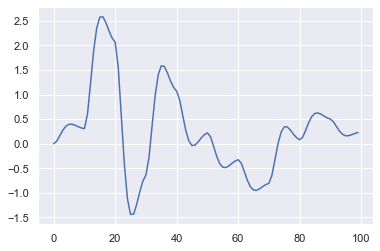

In [47]:
plt.plot(yts1[0:100])
xdata = np.arange(0,100,1)
plt.plot(xdata, predict, 'r')

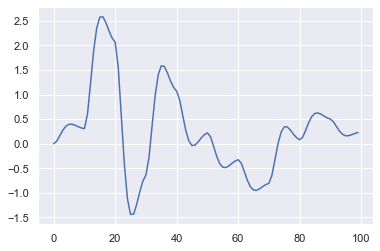

In [11]:
plt.plot(yts1[0:100])

In [86]:

for i in range(0,20):
    input = np.array(xts1[i:i+10])
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    print(yhat,yts1[i+10])
    

[[[0.3126424]]] 0.30621521
[[[0.59586513]]] 0.60179527
[[[1.2042658]]] 1.2347079
[[[1.835358]]] 1.8841497
[[[2.3179774]]] 2.3523475
[[[2.5519392]]] 2.5737296
[[[2.577691]]] 2.5815242
[[[2.4647253]]] 2.4585884
[[[2.3012383]]] 2.2932309
[[[2.1557515]]] 2.1510423
[[[2.053759]]] 2.0646435
[[[1.5660903]]] 1.5574684
[[[0.56640446]]] 0.56683073
[[[-0.4083889]]] -0.42290051
[[[-1.0955375]]] -1.1207282
[[[-1.41477]]] -1.437599
[[[-1.4117663]]] -1.4321095
[[[-1.2149585]]] -1.2343923
[[[-0.9639341]]] -0.97928762
[[[-0.766129]]] -0.76477249


In [78]:
for i in range(0,20):
    input = np.array(xts1[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    s=(yts1[i+10]-yhat) ** 2
    t = +s
    
e=t/20
print(e)
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

9.440648379192377e-06


In [79]:
x = [] # train
y = [] # test (answer)
for i in range(0, 880):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

#20データを最小二乗法で評価
for i in range(0,20):
    input = np.array(xts1[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    s=(yts1[i+10]-yhat) ** 2
    t = +s
    
e=t/20
print(e)

[[[1.3612493e-05]
  [1.2834216e-05]
  [1.2902778e-05]]]


In [80]:
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

1.3116494907687107e-05


In [82]:
x = [] # train
y = [] # test (answer)
for i in range(0, 550):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

#20データを最小二乗法で評価
for i in range(0,20):
    input = np.array(xts1[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    s=(yts1[i+10]-yhat) ** 2
    t = +s
    
e=t/20
print(e)

[[[1.7601848e-05]
  [1.8075705e-05]
  [1.4686581e-05]]]


In [ ]:
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

In [21]:
#15データ
x = [] # train
y = [] # test (answer)
for i in range(0, 80):
        tmpX = []
        for j in range(0, 15):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[15+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(15, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+15]) 
    input = input.reshape((1,15,1))
    yhat = m.predict(input)
    s=(yts1[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)

[[[0.00560156]]]


In [30]:
#20データ
x = [] # train
y = [] # test (answer)
for i in range(0, 80):
        tmpX = []
        for j in range(0, 20):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[20+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    s=(yts1[i+20]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[-0.00524046]]]


In [31]:
#25データ
x = [] # train
y = [] # test (answer)
for i in range(0, 75):
        tmpX = []
        for j in range(0, 25):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[25+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(25, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,25):
    input = np.array(xts1[i:i+25]) 
    input = input.reshape((1,25,1))
    yhat = m.predict(input)
    s=(yts1[i+25]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[3.4818055e-05]]]


In [27]:
#30データ
x = [] # train
y = [] # test (answer)
for i in range(0, 65):
        tmpX = []
        for j in range(0, 30):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[30+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(30, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,30):
    input = np.array(xts1[i:i+30]) 
    input = input.reshape((1,30,1))
    yhat = m.predict(input)
    s=(yts1[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[-0.00716124]]]


In [36]:
#30データ
x = [] # train
y = [] # test (answer)
for i in range(0, 50):
        tmpX = []
        for j in range(0, 50):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[30+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(50, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,50):
    input = np.array(xts1[i:i+50]) 
    input = input.reshape((1,50,1))
    yhat = m.predict(input)
    s=(yts1[i+50]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[0.00224608]]]


In [33]:
#1データ
x = [] # train
y = [] # test (answer)
for i in range(0, 1):
        tmpX = []
        for j in range(0, 1):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[1+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(1,1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,1):
    input = np.array(xts1[i:i+1])
    input = input.reshape((1,1,1))
    yhat = m.predict(input)
    s=(yts1[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[0.3310652]]]


In [35]:
#5データ
x = [] # train
y = [] # test (answer)
for i in range(0, 90):
        tmpX = []
        for j in range(0, 5):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts1[5+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(5, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,5):
    input = np.array(xts1[i:i+5]) 
    input = input.reshape((1,5,1))
    yhat = m.predict(input)
    s=(yts1[i+15]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
print(e)


[[[0.226101]]]


In [70]:
#10データ
x = [] # train
y = [] # test (answer)
for i in range(0, 880):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    s=(yts1[i+10]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)



0.009726124505201975


In [81]:
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 50):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[50+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(50, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+50]) 
    input = input.reshape((1,50,1))
    yhat = m.predict(input)
    s=(yts1[i+50]- (yhat)) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

0.0004319273478661974


In [83]:
x = [] # train
y = [] # test (answer)
for i in range(0, 860):
        tmpX = []
        for j in range(0,100):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[30+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(100, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+100]) 
    input = input.reshape((1,100,1))
    yhat = m.predict(input)
    s=(yts1[i+100]- (yhat)) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

nan


In [ ]:
for i in range(0,20):
    input = np.array(xts1[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    s=(yts1[i+20]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

In [48]:
for i in range(0,20):
    input = np.array(xts1[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    s=(yts1[i+15]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

0.046663319071133934


In [4]:
x = [] # train
y = [] # test (answer)
for i in range(0, 860):
        tmpX = []
        for j in range(0, 40):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[40+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(40, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)



for i in range(0,20):
    input = np.array(xts1[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    print(yhat,yts1[i+20:i+23])

[[[2.088184 ]
  [1.8140316]
  [1.0972562]]] 20    2.064643
21    1.557468
22    0.566831
Name: #data, dtype: float64
[[[ 1.6180547]
  [ 0.5791641]
  [-0.5485634]]] 21    1.557468
22    0.566831
23   -0.422901
Name: #data, dtype: float64
[[[ 0.545032  ]
  [-0.47620076]
  [-1.2020992 ]]] 22    0.566831
23   -0.422901
24   -1.120728
Name: #data, dtype: float64
[[[-0.49491465]
  [-1.2183304 ]
  [-1.5120014 ]]] 23   -0.422901
24   -1.120728
25   -1.437599
Name: #data, dtype: float64
[[[-1.2081717]
  [-1.5193932]
  [-1.4465498]]] 24   -1.120728
25   -1.437599
26   -1.432109
Name: #data, dtype: float64
[[[-1.4934608]
  [-1.4572741]
  [-1.1910747]]] 25   -1.437599
26   -1.432109
27   -1.234392
Name: #data, dtype: float64
[[[-1.4813054]
  [-1.2179801]
  [-0.8875188]]] 26   -1.432109
27   -1.234392
28   -0.979288
Name: #data, dtype: float64
[[[-1.292071  ]
  [-0.94309515]
  [-0.66124135]]] 27   -1.234392
28   -0.979288
29   -0.764772
Name: #data, dtype: float64
[[[-1.0565877 ]
  [-0.76583517]
  

In [64]:
x = [] # train
y = [] # test (answer)
for i in range(0, 860):
        tmpX = []
        for j in range(0, 40):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[40+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(40, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)


ValueError: cannot reshape array of size 40 into shape (1,4,1)

In [66]:
for i in range(0,20):
    input = np.array(xts1[i:i+40])
    input = input.reshape((1,40,1))
    yhat = m.predict(input)
    print(yhat,yts1[i+40:i+43])
    s=(yts1[i+20]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

[[[1.0625844]
  [0.8754732]
  [0.5155005]]] 40    1.068599
41    0.887510
42    0.569331
Name: #data, dtype: float64
[[[0.9121866 ]
  [0.577496  ]
  [0.25495818]]] 41    0.887510
42    0.569331
43    0.262382
Name: #data, dtype: float64
[[[0.5705904]
  [0.2629382]
  [0.0463746]]] 42    0.569331
43    0.262382
44    0.052546
Name: #data, dtype: float64
[[[ 0.267     ]
  [ 0.06129148]
  [-0.03619442]]] 43    0.262382
44    0.052546
45   -0.037122
Name: #data, dtype: float64
[[[ 0.05413368]
  [-0.02517495]
  [-0.01527497]]] 44    0.052546
45   -0.037122
46   -0.028133
Name: #data, dtype: float64
[[[-0.03830353]
  [-0.01719501]
  [ 0.05239219]]] 45   -0.037122
46   -0.028133
47    0.037535
Name: #data, dtype: float64
[[[-0.02671372]
  [ 0.04007053]
  [ 0.12909356]]] 46   -0.028133
47    0.037535
48    0.117954
Name: #data, dtype: float64
[[[0.03473824]
  [0.10970549]
  [0.18694769]]] 47    0.037535
48    0.117954
49    0.183569
Name: #data, dtype: float64
[[[0.10978939]
  [0.18625106]
  [0

In [68]:
for i in range(0,20):
    input = np.array(xts1[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    s=(yts1[i+20]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

0.031221861640612285


In [67]:
for i in range(0,20):
    input = np.array(xts1[i:i+40]) 
    input = input.reshape((1,40,1))
    yhat = m.predict(input)
    s=(yts1[i+40]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

0.00016571790911257267


In [74]:
x = [] # train
y = [] # test (answer)
for i in range(0,720):
        tmpX = []
        for j in range(0,200):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[200+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(200, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+200]) 
    input = input.reshape((1,200,1))
    yhat = m.predict(input)
    s=(yts1[i+200]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

KeyboardInterrupt: 

In [ ]:
#1データ
x = [] # train
y = [] # test (answer)
for i in range(0, 992):
        tmpX = []
        for j in range(0, 1):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[1+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(1,1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+1]) 
    input = input.reshape((1,1,1))
    yhat = m.predict(input)
    print(yhat,yts1[i+1:i+4])
    s=(yts1[i+1]) ** 2 - (yhat) ** 2
    t=+s
        
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

In [ ]:
#5データ
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 5):
            tmpX.append(xts1[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts1[5+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(5, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts1[i:i+5]) 
    input = input.reshape((1,5,1))
    yhat = m.predict(input)
    s=(yts1[i+5]) ** 2 - (yhat) ** 2
    t=+s
        
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)